## Import libraries and load the dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

In [2]:
df = pd.read_csv('./BTC.csv')
df1 = df.reset_index()['Price']

In [3]:
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

## 2. Split the data into training, test and validate  sets

In [4]:
train_size = int(0.6 * len(df1))
test_size = int(0.3 * len(df1))
val_size = len(df1) - train_size - test_size

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]
val_data = df1[train_size+test_size:]

print("Train shape:", train_data.shape)
print("Test shape:", test_data.shape)
print("Validate shape:", val_data.shape)

Train shape: (1214, 1)
Test shape: (607, 1)
Validate shape: (203, 1)


In [5]:
train_size = int(0.7 * len(df1))
test_size = int(0.2 * len(df1))
val_size = len(df1) - train_size - test_size

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]
val_data = df1[train_size+test_size:]

print("Train shape:", train_data.shape)
print("Test shape:", test_data.shape)
print("Validate shape:", val_data.shape)

Train shape: (1416, 1)
Test shape: (404, 1)
Validate shape: (204, 1)


In [6]:
train_size = int(0.6 * len(df1))
test_size = int(0.2 * len(df1))
val_size = len(df1) - train_size - test_size

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]
val_data = df1[train_size+test_size:]

print("Train shape:", train_data.shape)
print("Test shape:", test_data.shape)
print("Validate shape:", val_data.shape)

Train shape: (1214, 1)
Test shape: (404, 1)
Validate shape: (406, 1)


In [7]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, X=0,1,2,3-----99   Y=100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return np.array(dataX), np.array(dataY)

In [8]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_val, yval = create_dataset(val_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [9]:
# Reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)
X_val = X_val.reshape(X_val.shape[0],X_val.shape[1] , 1)

## 3. Perform RNN Model

## 3.1 Build the RNN Attention Model and fit train data into Model

In [10]:
model = Sequential()
model.add(SimpleRNN(50, input_shape=(time_step, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [11]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=300,batch_size=64,verbose=1)

Epoch 1/300
18/18 [==============================] - 2s 41ms/step - loss: 0.0694 - val_loss: 0.0041
Epoch 2/300
18/18 [==============================] - 0s 22ms/step - loss: 0.0056 - val_loss: 3.2418e-04
Epoch 3/300
18/18 [==============================] - 1s 29ms/step - loss: 0.0026 - val_loss: 2.9784e-04
Epoch 4/300
18/18 [==============================] - 1s 33ms/step - loss: 0.0022 - val_loss: 2.4698e-04
Epoch 5/300
18/18 [==============================] - 0s 26ms/step - loss: 0.0019 - val_loss: 2.3989e-04
Epoch 6/300
18/18 [==============================] - 0s 21ms/step - loss: 0.0018 - val_loss: 2.1120e-04
Epoch 7/300
18/18 [==============================] - 1s 31ms/step - loss: 0.0018 - val_loss: 1.8767e-04
Epoch 8/300
18/18 [==============================] - 0s 22ms/step - loss: 0.0017 - val_loss: 1.7527e-04
Epoch 9/300
18/18 [==============================] - 0s 26ms/step - loss: 0.0016 - val_loss: 1.8784e-04
Epoch 10/300
18/18 [==============================] - 0s 27ms/step -

18/18 [==============================] - 0s 28ms/step - loss: 5.4692e-04 - val_loss: 6.5153e-05
Epoch 78/300
18/18 [==============================] - 0s 22ms/step - loss: 5.6364e-04 - val_loss: 4.6494e-05
Epoch 79/300
18/18 [==============================] - 0s 21ms/step - loss: 5.9731e-04 - val_loss: 4.9187e-05
Epoch 80/300
18/18 [==============================] - 1s 31ms/step - loss: 5.3567e-04 - val_loss: 6.4208e-05
Epoch 81/300
18/18 [==============================] - 0s 18ms/step - loss: 5.2218e-04 - val_loss: 6.7299e-05
Epoch 82/300
18/18 [==============================] - 0s 20ms/step - loss: 5.0776e-04 - val_loss: 4.8103e-05
Epoch 83/300
18/18 [==============================] - 0s 25ms/step - loss: 5.0306e-04 - val_loss: 5.5188e-05
Epoch 84/300
18/18 [==============================] - 0s 19ms/step - loss: 5.1514e-04 - val_loss: 4.3920e-05
Epoch 85/300
18/18 [==============================] - 0s 21ms/step - loss: 5.0403e-04 - val_loss: 4.4969e-05
Epoch 86/300
18/18 [============

Epoch 152/300
18/18 [==============================] - 0s 21ms/step - loss: 4.1342e-04 - val_loss: 3.3379e-05
Epoch 153/300
18/18 [==============================] - 1s 29ms/step - loss: 4.1136e-04 - val_loss: 3.8307e-05
Epoch 154/300
18/18 [==============================] - 0s 21ms/step - loss: 3.9717e-04 - val_loss: 4.7572e-05
Epoch 155/300
18/18 [==============================] - 0s 21ms/step - loss: 4.1816e-04 - val_loss: 4.0692e-05
Epoch 156/300
18/18 [==============================] - 0s 19ms/step - loss: 4.2506e-04 - val_loss: 4.0085e-05
Epoch 157/300
18/18 [==============================] - 0s 19ms/step - loss: 4.6028e-04 - val_loss: 3.5151e-05
Epoch 158/300
18/18 [==============================] - 0s 19ms/step - loss: 3.9849e-04 - val_loss: 3.6802e-05
Epoch 159/300
18/18 [==============================] - 0s 19ms/step - loss: 4.0128e-04 - val_loss: 3.3426e-05
Epoch 160/300
18/18 [==============================] - 0s 19ms/step - loss: 4.0665e-04 - val_loss: 3.6960e-05
Epoch 161/

18/18 [==============================] - 1s 32ms/step - loss: 3.7662e-04 - val_loss: 4.1564e-05
Epoch 227/300
18/18 [==============================] - 1s 34ms/step - loss: 3.9392e-04 - val_loss: 3.8389e-05
Epoch 228/300
18/18 [==============================] - 0s 24ms/step - loss: 3.7734e-04 - val_loss: 3.8636e-05
Epoch 229/300
18/18 [==============================] - 0s 25ms/step - loss: 3.7705e-04 - val_loss: 4.2367e-05
Epoch 230/300
18/18 [==============================] - 1s 63ms/step - loss: 3.9569e-04 - val_loss: 3.3550e-05
Epoch 231/300
18/18 [==============================] - 2s 109ms/step - loss: 4.1725e-04 - val_loss: 3.6823e-05
Epoch 232/300
18/18 [==============================] - 1s 72ms/step - loss: 3.8896e-04 - val_loss: 4.5969e-05
Epoch 233/300
18/18 [==============================] - 0s 27ms/step - loss: 4.0747e-04 - val_loss: 3.9423e-05
Epoch 234/300
18/18 [==============================] - 1s 40ms/step - loss: 3.8498e-04 - val_loss: 3.4767e-05
Epoch 235/300
18/18 [==

18/18 [==============================] - 0s 28ms/step - loss: 3.7296e-04 - val_loss: 3.3942e-05


In [12]:
def evaluate_rnn_attention_model(actual, X_data):
    y_pred = model.predict(X_data)
    mse = mean_squared_error(actual, y_pred)
    mae = mean_absolute_error(actual, y_pred)
    mape = mean_absolute_percentage_error(actual, y_pred)
    rmse = mean_squared_error(actual, y_pred, squared=False)
    return y_pred, mse, mae, mape, rmse

### 3.2 Evaluate on Validate data

In [13]:
y_pred_val, val_mse, val_mae, val_mape, val_rmse = evaluate_rnn_attention_model(yval, X_val)

10/10 [==============================] - 1s 14ms/step


### 3.3 Evaluate on Test data

In [14]:
y_pred_test, test_mse, test_mae, test_mape, test_rmse = evaluate_rnn_attention_model(ytest, X_test)

10/10 [==============================] - 0s 8ms/step


In [15]:
train_predict = model.predict(X_train)
train_predict = scaler.inverse_transform(train_predict)
y_pred_test = scaler.inverse_transform(y_pred_test)
y_pred_val = scaler.inverse_transform(y_pred_val)

35/35 [==============================] - 0s 10ms/step


### 3.4 Predict price for the next 30 days

In [17]:
x_input=val_data[60:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=345
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1


0 day input [0.04974245 0.04950761 0.05047186 0.05189178 0.05091976 0.05024946
 0.05053718 0.04910637 0.04970513 0.04932876 0.04879065 0.04816545
 0.04831009 0.05066004 0.05078601 0.05103174 0.05098508 0.05135367
 0.05132257 0.05174403 0.05216706 0.05199909 0.05106284 0.05202864
 0.05377827 0.0540691  0.05398356 0.04818256 0.04810324 0.04763045
 0.04681862 0.05271139 0.0532215  0.05351389 0.05260252 0.0523739
 0.05303954 0.05218572 0.05099752 0.05165228 0.05255897 0.05297889
 0.0524921  0.05299133 0.05381871 0.0503801  0.0500224  0.05218416
 0.05405044 0.05444702 0.05502401 0.05070825 0.04917168 0.04841895
 0.04701769 0.05087933 0.05117171 0.05062271 0.05061027 0.04835674
 0.04767089 0.04809236 0.04680929 0.04596636 0.04917946 0.05109395
 0.05409243 0.06452335 0.06276128 0.06322318 0.06160108 0.05917803
 0.05855438 0.05910493 0.05981256 0.05705981 0.05418419 0.05452789
 0.05368185 0.05120592 0.04869267 0.05059939 0.04726964 0.0505885
 0.04899594 0.05214684 0.04786996 0.04709545 0.04605

2 day output [[0.10670639]]
3 day input [0.05189178 0.05091976 0.05024946 0.05053718 0.04910637 0.04970513
 0.04932876 0.04879065 0.04816545 0.04831009 0.05066004 0.05078601
 0.05103174 0.05098508 0.05135367 0.05132257 0.05174403 0.05216706
 0.05199909 0.05106284 0.05202864 0.05377827 0.0540691  0.05398356
 0.04818256 0.04810324 0.04763045 0.04681862 0.05271139 0.0532215
 0.05351389 0.05260252 0.0523739  0.05303954 0.05218572 0.05099752
 0.05165228 0.05255897 0.05297889 0.0524921  0.05299133 0.05381871
 0.0503801  0.0500224  0.05218416 0.05405044 0.05444702 0.05502401
 0.05070825 0.04917168 0.04841895 0.04701769 0.05087933 0.05117171
 0.05062271 0.05061027 0.04835674 0.04767089 0.04809236 0.04680929
 0.04596636 0.04917946 0.05109395 0.05409243 0.06452335 0.06276128
 0.06322318 0.06160108 0.05917803 0.05855438 0.05910493 0.05981256
 0.05705981 0.05418419 0.05452789 0.05368185 0.05120592 0.04869267
 0.05059939 0.04726964 0.0505885  0.04899594 0.05214684 0.04786996
 0.04709545 0.04605812 

5 day output [[0.08602904]]
6 day input [0.05053718 0.04910637 0.04970513 0.04932876 0.04879065 0.04816545
 0.04831009 0.05066004 0.05078601 0.05103174 0.05098508 0.05135367
 0.05132257 0.05174403 0.05216706 0.05199909 0.05106284 0.05202864
 0.05377827 0.0540691  0.05398356 0.04818256 0.04810324 0.04763045
 0.04681862 0.05271139 0.0532215  0.05351389 0.05260252 0.0523739
 0.05303954 0.05218572 0.05099752 0.05165228 0.05255897 0.05297889
 0.0524921  0.05299133 0.05381871 0.0503801  0.0500224  0.05218416
 0.05405044 0.05444702 0.05502401 0.05070825 0.04917168 0.04841895
 0.04701769 0.05087933 0.05117171 0.05062271 0.05061027 0.04835674
 0.04767089 0.04809236 0.04680929 0.04596636 0.04917946 0.05109395
 0.05409243 0.06452335 0.06276128 0.06322318 0.06160108 0.05917803
 0.05855438 0.05910493 0.05981256 0.05705981 0.05418419 0.05452789
 0.05368185 0.05120592 0.04869267 0.05059939 0.04726964 0.0505885
 0.04899594 0.05214684 0.04786996 0.04709545 0.04605812 0.04707057
 0.04796794 0.04670198 0

8 day output [[0.08656441]]
9 day input [0.04932876 0.04879065 0.04816545 0.04831009 0.05066004 0.05078601
 0.05103174 0.05098508 0.05135367 0.05132257 0.05174403 0.05216706
 0.05199909 0.05106284 0.05202864 0.05377827 0.0540691  0.05398356
 0.04818256 0.04810324 0.04763045 0.04681862 0.05271139 0.0532215
 0.05351389 0.05260252 0.0523739  0.05303954 0.05218572 0.05099752
 0.05165228 0.05255897 0.05297889 0.0524921  0.05299133 0.05381871
 0.0503801  0.0500224  0.05218416 0.05405044 0.05444702 0.05502401
 0.05070825 0.04917168 0.04841895 0.04701769 0.05087933 0.05117171
 0.05062271 0.05061027 0.04835674 0.04767089 0.04809236 0.04680929
 0.04596636 0.04917946 0.05109395 0.05409243 0.06452335 0.06276128
 0.06322318 0.06160108 0.05917803 0.05855438 0.05910493 0.05981256
 0.05705981 0.05418419 0.05452789 0.05368185 0.05120592 0.04869267
 0.05059939 0.04726964 0.0505885  0.04899594 0.05214684 0.04786996
 0.04709545 0.04605812 0.04707057 0.04796794 0.04670198 0.04546868
 0.05147965 0.0475107  

12 day input [0.04831009 0.05066004 0.05078601 0.05103174 0.05098508 0.05135367
 0.05132257 0.05174403 0.05216706 0.05199909 0.05106284 0.05202864
 0.05377827 0.0540691  0.05398356 0.04818256 0.04810324 0.04763045
 0.04681862 0.05271139 0.0532215  0.05351389 0.05260252 0.0523739
 0.05303954 0.05218572 0.05099752 0.05165228 0.05255897 0.05297889
 0.0524921  0.05299133 0.05381871 0.0503801  0.0500224  0.05218416
 0.05405044 0.05444702 0.05502401 0.05070825 0.04917168 0.04841895
 0.04701769 0.05087933 0.05117171 0.05062271 0.05061027 0.04835674
 0.04767089 0.04809236 0.04680929 0.04596636 0.04917946 0.05109395
 0.05409243 0.06452335 0.06276128 0.06322318 0.06160108 0.05917803
 0.05855438 0.05910493 0.05981256 0.05705981 0.05418419 0.05452789
 0.05368185 0.05120592 0.04869267 0.05059939 0.04726964 0.0505885
 0.04899594 0.05214684 0.04786996 0.04709545 0.04605812 0.04707057
 0.04796794 0.04670198 0.04546868 0.05147965 0.0475107  0.05437393
 0.05777521 0.05907383 0.05887476 0.06516877 0.0669

15 day output [[0.05654019]]
16 day input [0.05098508 0.05135367 0.05132257 0.05174403 0.05216706 0.05199909
 0.05106284 0.05202864 0.05377827 0.0540691  0.05398356 0.04818256
 0.04810324 0.04763045 0.04681862 0.05271139 0.0532215  0.05351389
 0.05260252 0.0523739  0.05303954 0.05218572 0.05099752 0.05165228
 0.05255897 0.05297889 0.0524921  0.05299133 0.05381871 0.0503801
 0.0500224  0.05218416 0.05405044 0.05444702 0.05502401 0.05070825
 0.04917168 0.04841895 0.04701769 0.05087933 0.05117171 0.05062271
 0.05061027 0.04835674 0.04767089 0.04809236 0.04680929 0.04596636
 0.04917946 0.05109395 0.05409243 0.06452335 0.06276128 0.06322318
 0.06160108 0.05917803 0.05855438 0.05910493 0.05981256 0.05705981
 0.05418419 0.05452789 0.05368185 0.05120592 0.04869267 0.05059939
 0.04726964 0.0505885  0.04899594 0.05214684 0.04786996 0.04709545
 0.04605812 0.04707057 0.04796794 0.04670198 0.04546868 0.05147965
 0.0475107  0.05437393 0.05777521 0.05907383 0.05887476 0.06516877
 0.06698217 0.0680832

18 day output [[0.04179377]]
19 day input [0.05174403 0.05216706 0.05199909 0.05106284 0.05202864 0.05377827
 0.0540691  0.05398356 0.04818256 0.04810324 0.04763045 0.04681862
 0.05271139 0.0532215  0.05351389 0.05260252 0.0523739  0.05303954
 0.05218572 0.05099752 0.05165228 0.05255897 0.05297889 0.0524921
 0.05299133 0.05381871 0.0503801  0.0500224  0.05218416 0.05405044
 0.05444702 0.05502401 0.05070825 0.04917168 0.04841895 0.04701769
 0.05087933 0.05117171 0.05062271 0.05061027 0.04835674 0.04767089
 0.04809236 0.04680929 0.04596636 0.04917946 0.05109395 0.05409243
 0.06452335 0.06276128 0.06322318 0.06160108 0.05917803 0.05855438
 0.05910493 0.05981256 0.05705981 0.05418419 0.05452789 0.05368185
 0.05120592 0.04869267 0.05059939 0.04726964 0.0505885  0.04899594
 0.05214684 0.04786996 0.04709545 0.04605812 0.04707057 0.04796794
 0.04670198 0.04546868 0.05147965 0.0475107  0.05437393 0.05777521
 0.05907383 0.05887476 0.06516877 0.06698217 0.06808327 0.06999621
 0.07695897 0.0775577

21 day output [[0.0273089]]
22 day input [0.05106284 0.05202864 0.05377827 0.0540691  0.05398356 0.04818256
 0.04810324 0.04763045 0.04681862 0.05271139 0.0532215  0.05351389
 0.05260252 0.0523739  0.05303954 0.05218572 0.05099752 0.05165228
 0.05255897 0.05297889 0.0524921  0.05299133 0.05381871 0.0503801
 0.0500224  0.05218416 0.05405044 0.05444702 0.05502401 0.05070825
 0.04917168 0.04841895 0.04701769 0.05087933 0.05117171 0.05062271
 0.05061027 0.04835674 0.04767089 0.04809236 0.04680929 0.04596636
 0.04917946 0.05109395 0.05409243 0.06452335 0.06276128 0.06322318
 0.06160108 0.05917803 0.05855438 0.05910493 0.05981256 0.05705981
 0.05418419 0.05452789 0.05368185 0.05120592 0.04869267 0.05059939
 0.04726964 0.0505885  0.04899594 0.05214684 0.04786996 0.04709545
 0.04605812 0.04707057 0.04796794 0.04670198 0.04546868 0.05147965
 0.0475107  0.05437393 0.05777521 0.05907383 0.05887476 0.06516877
 0.06698217 0.06808327 0.06999621 0.07695897 0.07755773 0.07784545
 0.07711916 0.07322486

24 day output [[0.00873342]]
25 day input [0.0540691  0.05398356 0.04818256 0.04810324 0.04763045 0.04681862
 0.05271139 0.0532215  0.05351389 0.05260252 0.0523739  0.05303954
 0.05218572 0.05099752 0.05165228 0.05255897 0.05297889 0.0524921
 0.05299133 0.05381871 0.0503801  0.0500224  0.05218416 0.05405044
 0.05444702 0.05502401 0.05070825 0.04917168 0.04841895 0.04701769
 0.05087933 0.05117171 0.05062271 0.05061027 0.04835674 0.04767089
 0.04809236 0.04680929 0.04596636 0.04917946 0.05109395 0.05409243
 0.06452335 0.06276128 0.06322318 0.06160108 0.05917803 0.05855438
 0.05910493 0.05981256 0.05705981 0.05418419 0.05452789 0.05368185
 0.05120592 0.04869267 0.05059939 0.04726964 0.0505885  0.04899594
 0.05214684 0.04786996 0.04709545 0.04605812 0.04707057 0.04796794
 0.04670198 0.04546868 0.05147965 0.0475107  0.05437393 0.05777521
 0.05907383 0.05887476 0.06516877 0.06698217 0.06808327 0.06999621
 0.07695897 0.07755773 0.07784545 0.07711916 0.07322486 0.07690609
 0.08053444 0.0698966

27 day output [[-0.00751193]]
28 day input [ 0.04810324  0.04763045  0.04681862  0.05271139  0.0532215   0.05351389
  0.05260252  0.0523739   0.05303954  0.05218572  0.05099752  0.05165228
  0.05255897  0.05297889  0.0524921   0.05299133  0.05381871  0.0503801
  0.0500224   0.05218416  0.05405044  0.05444702  0.05502401  0.05070825
  0.04917168  0.04841895  0.04701769  0.05087933  0.05117171  0.05062271
  0.05061027  0.04835674  0.04767089  0.04809236  0.04680929  0.04596636
  0.04917946  0.05109395  0.05409243  0.06452335  0.06276128  0.06322318
  0.06160108  0.05917803  0.05855438  0.05910493  0.05981256  0.05705981
  0.05418419  0.05452789  0.05368185  0.05120592  0.04869267  0.05059939
  0.04726964  0.0505885   0.04899594  0.05214684  0.04786996  0.04709545
  0.04605812  0.04707057  0.04796794  0.04670198  0.04546868  0.05147965
  0.0475107   0.05437393  0.05777521  0.05907383  0.05887476  0.06516877
  0.06698217  0.06808327  0.06999621  0.07695897  0.07755773  0.07784545
  0.07711

29 day output [[-0.0238825]]


### 4.  Evaluate accuracy validate, test data

In [18]:
metrics = {
    'MSE': [val_mse, test_mse],
    'MAE': [val_mae, test_mae],
    'MAPE': [val_mape, test_mape],
    'RMSE': [val_rmse, test_rmse],
}

acc = pd.DataFrame(metrics, index=['Validate', 'Test'])

print(acc)

               MSE       MAE      MAPE      RMSE
Validate  0.000074  0.005586  0.059482  0.008591
Test      0.000034  0.003898  0.107751  0.005826


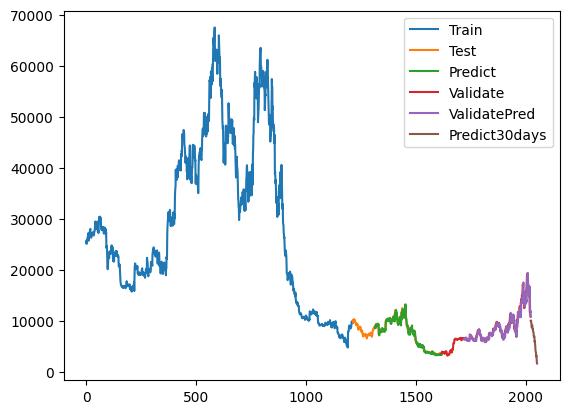

In [19]:
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))
test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))
test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index,(y_pred_test))
val_data_index = pd.RangeIndex(start=train_size+test_size, stop=train_size+test_size+val_size, step=1)
plt.plot(val_data_index,scaler.inverse_transform(val_data))
val_data_index = pd.RangeIndex(start=train_size+test_size+101, stop=train_size+test_size+val_size, step=1)
plt.plot(val_data_index,y_pred_val)
prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+29, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output))
plt.legend(['Train','Test','Predict','Validate','ValidatePred','Predict30days'])
plt.show()